Instructions: To complete the following task using Python, please download an
Integrated Development Environment (IDE) of your choice. Ensure that your solution
includes both the written code (input) and its corresponding output. Once completed,
upload your solution in PDF format or any other format you prefer. The questions
are worth 50 points each.

Question 1: Financial Sentiment Analysis
Background:
The utilization of statistical techniques in financial sentiment analysis is often limited
due to complexities in practical applications and a shortage of high-quality training
data. In finance and economics texts, where annotated datasets are scarce and largely
proprietary, this challenge becomes more pronounced. To address this, a collection of
approximately 5000 sentences has been compiled to establish benchmarks for various
modeling techniques.
Dataset:
The original Financial Phrase Bank data contains 4840 sentences, annotated by 16 individuals with robust backgrounds in financial markets, including researchers from Aalto
University School of Business. However, this assignment focuses on approximately 47%
of the dataset, which corresponds to sentences with 100% agreement among the annotators. The analysis will center on sentences with unanimous annotator agreement, labeled
as ’positive’, ’negative’, and ’neutral’.

1. Data Preparation:
• Load and convert the text file into a DataFrame with columns: ’Text’ and
’Sentiment’.

In [2]:
import os
print(os.getcwd())

c:\Users\Micha\github\GWU\SEAS 6414\Class Material\Lecture 07


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)

#create a generator to feed the data to the dataframe.
HW7F1 = pd.read_csv('./Q1_FinancialDataset_Sentences_AllAgree.txt',sep='.@',names=['Text','Sentiment'],header=None,engine='python')
#with open('./Q1_FinancialDataset_Sentences_AllAgree.txt', encoding="utf8") as myfile:
#    mydata = (line for line in myfile)
#    HW7F1 = pd.DataFrame(mydata, columns=['line'])
#HW7F1['tag'] = [len(aLine) for aLine in HW7F1.line]
HW7F1

,Text,Sentiment
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive
...,...,...
2259,Operating result for the 12-month period decre...,negative
2260,HELSINKI Thomson Financial - Shares in Cargote...,negative
2261,LONDON MarketWatch -- Share prices ended lower...,negative
2262,Operating profit fell to EUR 35.4 mn from EUR ...,negative


Exploratory Data Analysis (EDA):
• Perform EDA and plot bar charts for the frequency of the top 20 words in
each sentiment category.

<Axes: title={'center': 'Top 20 words for sentiment positive'}>

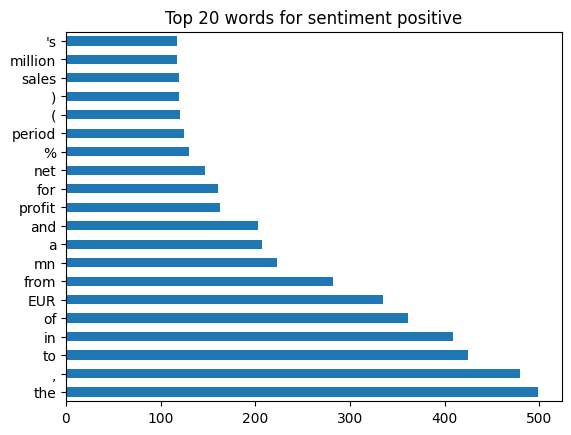

In [18]:
import matplotlib.pyplot as plt
sel = 'positive'
plt.title(f"Top 20 words for sentiment {sel}")
HW7F1.loc[HW7F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts()[:20].plot(kind='barh')
# Too many small words and punctuation. I wil get rid of words that are three characters or fewer. But, I can't see a way
# to do this in one line.

<Axes: title={'center': 'Top 20 words (4 or more characters) for sentiment positive'}>

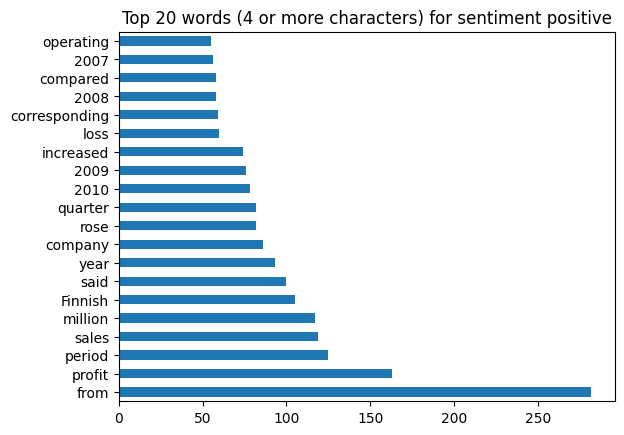

In [22]:
sel = 'positive'
HW7F1Words = HW7F1.loc[HW7F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts()
plt.title(f"Top 20 words (4 or more characters) for sentiment {sel}")
HW7F1Words[HW7F1Words.index.str.get(3).notnull()][:20].plot(kind='barh')
# This is much better. I will use this approach. I could remove the years, but that may be better left as a business decision.

<Axes: title={'center': 'Top 20 words (4 or more characters) for sentiment negative'}>

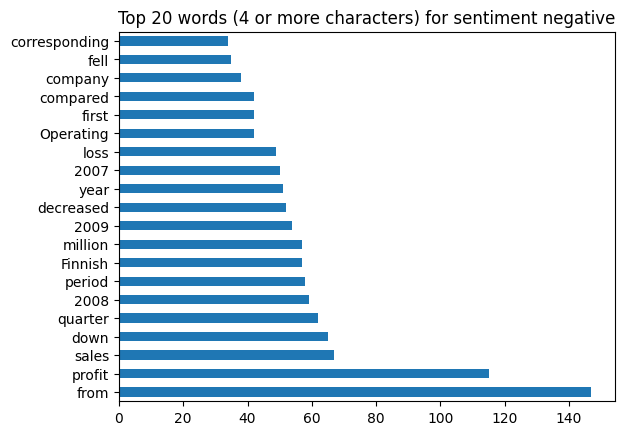

In [23]:
sel = 'negative'
HW7F1Words = HW7F1.loc[HW7F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts()
plt.title(f"Top 20 words (4 or more characters) for sentiment {sel}")
HW7F1Words[HW7F1Words.index.str.get(3).notnull()][:20].plot(kind='barh')

<Axes: title={'center': 'Top 20 words (4 or more characters) for sentiment neutral'}>

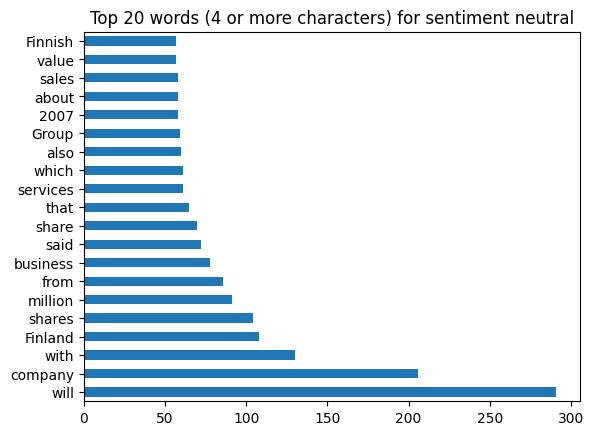

In [24]:
sel = 'neutral'
HW7F1Words = HW7F1.loc[HW7F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts()
plt.title(f"Top 20 words (4 or more characters) for sentiment {sel}")
HW7F1Words[HW7F1Words.index.str.get(3).notnull()][:20].plot(kind='barh')


Class Imbalance Analysis:
• Compute and visualize the frequency of each sentiment label with a bar graph.
Discuss class imbalance.

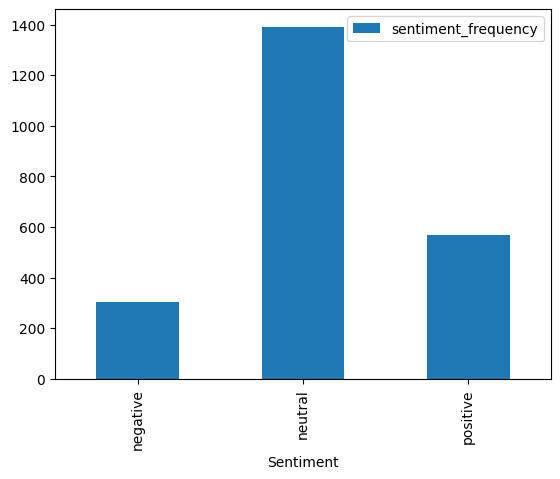

In [26]:
HW7F1Group = HW7F1.groupby("Sentiment").agg(
    sentiment_frequency=("Text", "count")
).plot(kind='bar')

I would have expected the sentiment of 'negative' to be the most frequent. This is because people generally do not speak up unless they have a complaint. But it may have to do with the source. The 'neutral' sentiment may be the most common since it is not a customer service site.

Word Count Analysis:
• Create box plots for word/token counts per sentiment label. Discuss discrepancies.

In [78]:
#sel = 'positive'
#HW7F1WordsP = HW7F1.loc[HW7F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts().to_frame().rename(columns={"count":sel})
#HW7F1WordsP['Sentiment'] = sel
#sel = 'negative'
#HW7F1WordsN = HW7F1.loc[HW7F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts().to_frame().rename(columns={"count":sel})
#HW7F1WordsN['Sentiment'] = sel
#sel = 'neutral'
#HW7F1WordsU = HW7F1.loc[HW7F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts().to_frame().rename(columns={"count":sel})
#HW7F1WordsJ = HW7F1WordsP.join(HW7F1WordsN, how='outer')
#HW7F1Words = HW7F1WordsJ.join(HW7F1WordsU, how='outer')
#HW7F1Words.fillna(0,inplace=True)
#HW7F1Words.reset_index(drop=True, inplace=True)

HW7F1['wordcount'] = HW7F1['Text'].apply(lambda x: len(str(x).split()))

#HW7F1WordsU['Sentiment'] = sel
#HW7F1Words = pd.concat([HW7F1WordsP, HW7F1WordsN, HW7F1WordsU])
#plt.title(f"Top 20 words (4 or more characters) for sentiment {sel}")
#HW7F1Words[HW7F1Words.index.str.get(3).notnull()][:20].plot(kind='barh')
#HW7F1Words = HW7F1['Text'].str.split(expand=True).stack().value_counts()
#HW7F1Words.boxplot( column=['positive','negative','neutral'])
HW7F1Words
#print(type(HW7F1Words))

,positive,negative,neutral
0,0.00,0.00,1.00
1,57.00,41.00,39.00
2,130.00,76.00,83.00
3,6.00,6.00,33.00
4,20.00,7.00,34.00
...,...,...,...
7715,0.00,0.00,7.00
7716,1.00,0.00,0.00
7717,0.00,0.00,1.00
7718,0.00,0.00,1.00


   Col1  Col2  Col3  Col4
0  0.47 -1.19  1.43 -0.31
1 -0.72  0.89  0.86 -0.64
2  0.02 -2.24  1.15  0.99
3  0.95 -2.02 -0.33  0.00
4  0.41  0.29  1.32 -1.55
5 -0.20 -0.66  0.19  0.55
6  1.32 -0.47  0.68 -1.82
7 -0.18  1.06 -0.40  0.34
8  1.05  1.05  0.86 -0.12
9  0.12 -0.32  0.84  2.39


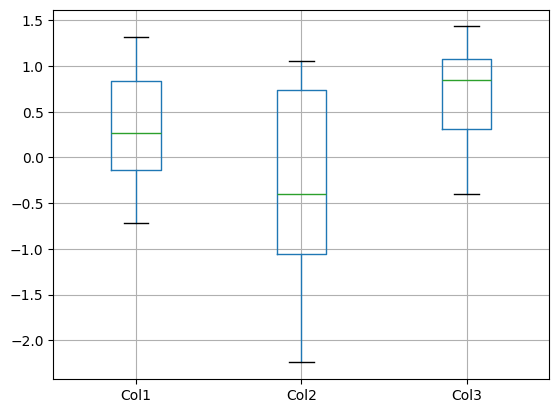

In [66]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])
print(df)
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])  